In [ ]:
%matplotlib inline

In [2]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
################settings
#mpl.style.reload_library()
#plt.style.use('rms_paper')


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [3]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG1_GMST+AMOC/';os.chdir(rundir)
srcdir_base='/space/hall4/sitestore/eccc/crd/ccrn/users/cmr203/ncconv/netcdfconv'    
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post'

do_calc=True
varnm='tas'
if do_calc:
    os.system('mkdir -p {}/DATA_{}_canesm5'.format(datadir,varnm))
    os.chdir('{}/DATA_{}_canesm5'.format(datadir,varnm))
    os.system('/bin/rm *.nc')
    # all historical 
    os.system('ln -s ' + srcdir_base +'/pre-final/*/*/*/*/esm-1pctCO2/*/*/tas/*/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/p2-zec750*/*/*/*/*/*/*/*/tas/*/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/final/*/*/*/*/esm-1pct-brch-1000PgC/*/*/tas/*/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/p2-zec1500*/*/*/*/*/*/*/*/tas/*/*/*.nc .')

    # concat
    ens_his = rut.cd_mkensemble('*esm-1pctCO2*',mip='cmip6')
    ens_his = cd.cat_exp_slices(ens_his)
    ens_15c = rut.cd_mkensemble('*esm-1pct-brch-750PgC*',mip='cmip6')    
    ens_15c = cd.cat_exp_slices(ens_15c)
    ens_20c = rut.cd_mkensemble('*esm-1pct-brch-1000PgC*',mip='cmip6')
    ens_20c = cd.cat_exp_slices(ens_20c)
    ens_30c = rut.cd_mkensemble('*esm-1pct-brch-1500PgC*',mip='cmip6')
    ens_30c = cd.cat_exp_slices(ens_30c)

    print 'Calculate global annual mean'
    # annual means            
    my_cdo_str='cdo -yearmean  {infile} {outfile}' 
    ens_his=cd.my_operator(ens_his, my_cdo_str, output_prefix='am_',delete=True)
    ens_15c=cd.my_operator(ens_15c, my_cdo_str, output_prefix='am_',delete=True)
    ens_20c=cd.my_operator(ens_20c, my_cdo_str, output_prefix='am_',delete=True)
    ens_30c=cd.my_operator(ens_30c, my_cdo_str, output_prefix='am_',delete=True)
    # global mean            
    my_cdo_str='cdo -fldmean  {infile} {outfile}' 
    ens_his=cd.my_operator(ens_his, my_cdo_str, output_prefix='gm',delete=True)
    ens_15c=cd.my_operator(ens_15c, my_cdo_str, output_prefix='gm',delete=True)
    ens_20c=cd.my_operator(ens_20c, my_cdo_str, output_prefix='gm',delete=True)
    ens_30c=cd.my_operator(ens_30c, my_cdo_str, output_prefix='gm',delete=True)
 
else:
    os.chdir('{}/DATA_{}_canesm5'.format(datadir,varnm))  
    ens_his=rut.cd_mkensemble('gmam_*_esm-1pctCO2*',prefix='gmam_',mip='cmip6')
    ens_15c=rut.cd_mkensemble('gmam_*_esm-1pct-brch-750PgC*',prefix='gmam_',mip='cmip6')
    ens_20c=rut.cd_mkensemble('gmam_*_esm-1pct-brch-1000PgC*',prefix='gmam_',mip='cmip6')
    ens_30c=rut.cd_mkensemble('gmam_*_esm-1pct-brch-1500PgC*',prefix='gmam_',mip='cmip6')


tas_his=cd.loadfiles(ens_his,'tas')['data']
tas_15c=cd.loadfiles(ens_15c,'tas')['data']
tas_20c=cd.loadfiles(ens_20c,'tas')['data']
tas_30c=cd.loadfiles(ens_30c,'tas')['data']

os.chdir(rundir)

tas0=np.mean(tas_his[:,0])
tas_his=tas_his-tas0
tas_15c=tas_15c-tas0
tas_20c=tas_20c-tas0
tas_30c=tas_30c-tas0

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
20 ncfiles

 For more details use ens.fulldetails() 

joining files
joining files
joining files
joining files
joining files
This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
30 ncfiles

 For more details use ens.fulldetails() 

joining files
joining files
joining files
joining files
joining files
This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
20 ncfiles

 For more details use ens.fulldetails() 

joining files
joining files
joining files
joining files
joining files
Calculate global annual mean
Removing tas from r1i1p2f1
Removing r1i1p2f1 from esm-1pctCO2
Removing tas from r2i1p2f1
Removing r2i1p2f1 from esm-1pctCO2
Removing tas from r3i1p2f1
Removing r3i1p2f1 from esm-1pctCO2
Removing tas from r4i1p2f1
Removing r4i1p2f1 from esm-1pctCO2
Re

2. Plot
#####################################################

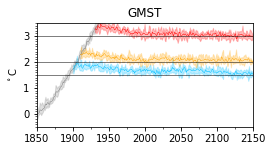

In [4]:
fig1, ax = plt.subplots(1,1, figsize=(8,8)); 
fig1.subplots_adjust(bottom=0.7,right=0.5,hspace=0.3,wspace=0.25)

####### years    
years_his=np.arange(1850,2000+1)
years_15c=np.arange(1901,2150+1)
years_20c=np.arange(1911,2150+1)
years_30c=np.arange(1931,2150+1)

####### stats    

    
ax.set_xlim([1850, 2150]) 
    
ax.set_xticks(np.arange(1850,2125,25))
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(25)) 

ax.set_ylim([-0.5, 3.5])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel('$^\circ$C')
    
####### plot
#meanstart=-202
##his##
kwargs={'linewidth': 0.5, 'color': 'gray'}
ax.plot(years_his,np.mean(tas_his,axis=0),**kwargs)                                    
kwargs={'color':'gray', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_his,np.min(tas_his,axis=0), np.max(tas_his,axis=0),**kwargs)

##15c##
kwargs={'linewidth': 0.5, 'color': 'deepskyblue'}
ax.plot(years_15c,np.mean(tas_15c,axis=0),**kwargs)                                    
kwargs={'color':'deepskyblue', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_15c,np.min(tas_15c,axis=0), np.max(tas_15c,axis=0),**kwargs)
##20c##
kwargs={'linewidth': 0.5, 'color': 'orange'}
ax.plot(years_20c,np.mean(tas_20c,axis=0),**kwargs)
kwargs={'color':'orange', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_20c,np.min(tas_20c,axis=0), np.max(tas_20c,axis=0),**kwargs)

##30c##
kwargs={'linewidth': 0.5, 'color': 'red'}
ax.plot(years_30c,np.mean(tas_30c,axis=0),**kwargs)
kwargs={'color':'red', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_30c,np.min(tas_30c,axis=0), np.max(tas_30c,axis=0),**kwargs)
ax.axhline(y=3,color="black",linewidth=0.5)
ax.axhline(y=2,color="black",linewidth=0.5)
ax.axhline(y=1.5,color="black",linewidth=0.5)

##legend##
#ax.text(1855,9,'1% CO2 per year',color= 'gray')
#ax.text(2350,14,'1.5$^\circ$C (5 runs)',color= 'deepskyblue')
#ax.text(1855,8,'2.0$^\circ$C (1000 PgC)',color= 'orange')
#ax.text(2350,13,'3.0$^\circ$C (5 runs)',color= 'red')

# plots=====================================
#
rpl.add_title(ax,'GMST')
rpl.mysavefig(fig1,'PLOTS/GMST_CanESM5.png')













